In [2]:
# ===============================
# 1. Import Required Libraries
# ===============================
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# ===============================
# 2. Load the Dataset
# ===============================
data=pd.read_csv(r"D:\AIML\dataset\loanData.csv" , on_bad_lines='skip')

df = pd.DataFrame(data)


# ===============================
# 3. Drop Non-Useful Column
# ===============================
df = df.drop(columns=["Employee ID"])


# ===============================
# 4. Separate Features and Target
# ===============================
X = df.drop(columns=["Attrition (Target)"])
y = df["Attrition (Target)"].map({"Yes": 1, "No": 0})


# ===============================
# 5. Define Feature Types
# ===============================
numeric_features = [
    "Salary (Monthly)",
    "Experience (Years)",
    "Work Hours (Weekly)",
    "Satisfaction Level (0-1)"
]

categorical_features = ["Job Role"]


# ===============================
# 6. Create Preprocessing Pipeline
# ===============================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)
    ]
)


# ===============================
# 7. Create Full ML Pipeline
# ===============================
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42))
    ]
)


# ===============================
# 8. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ===============================
# 9. Train the Model
# ===============================
model.fit(X_train, y_train)


# ===============================
# 10. Make Predictions
# ===============================
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)


# ===============================
# 11. Evaluate the Model
# ===============================
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Accuracy on train data:", accuracy_score(y_train,x_pred))
print("Achha hai 😁😁😁😁😁")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy on test data: 1.0
Accuracy on train data: 1.0
Achha hai 😁😁😁😁😁

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



c:\Users\harip\.conda\envs\myenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


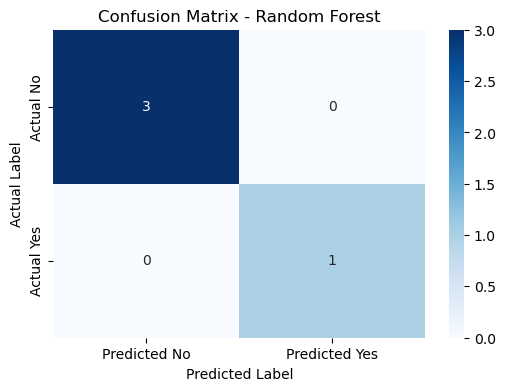

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
